<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/FuncApproxPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An implementation of a neural network in PyTorch to model the function $f(x) = \sin(x) + \sqrt{x}$

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

Define the function to model:

In the code, we define a function f that takes a tensor x as input and returns the output tensor obtained by applying the sine and square root functions to x.

In [2]:
def f(x):
    return torch.sin(x) + torch.sqrt(x)

Generate the training data:

We generate num_points equally spaced points between 0 and 10, and used the f function to obtain the corresponding output values.

In [3]:
num_points = 1000
x_train = torch.linspace(0, 10, num_points)
y_train = f(x_train)

Define the neural network:

We define a three-layer feedforward neural network with one input, two hidden, and one output layers. We have used nn.Linear to define the linear transformations of each layer, and nn.Tanh as the activation function.

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.sin(x)
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        x = torch.tanh(x)
        x = self.fc3(x)
        return x

Train the model:

We create an instance of the Net class and define the loss function as mean squared error (MSE). We use the Adam optimizer with a learning rate of 0.01 to update the weights of the network. We train the network on the training data (x_train, y_train) for num_epochs iterations.

In [5]:
net = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = net(x_train.unsqueeze(1))
    loss = criterion(y_pred, y_train.unsqueeze(1))
    loss.backward()
    optimizer.step()

Evaluate the model:

We use the trained network to predict the output values for x_test, and compare the predicted values with the ground truth using a plot. The predicted values are obtained by applying the trained network to x_test, and squeezing the output tensor to obtain a 1D array. The torch.no_grad() context manager is used to disable gradient calculation during the evaluation phase.

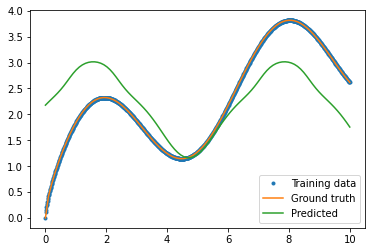

In [6]:
x_test = torch.linspace(0, 10, 100)
y_test = f(x_test)
with torch.no_grad():
    y_pred = net(x_test.unsqueeze(1))

plt.plot(x_train, y_train, '.', label='Training data')
plt.plot(x_test, y_test, label='Ground truth')
plt.plot(x_test, y_pred.squeeze(), label='Predicted')
plt.legend()
plt.show()